# Network Notes

In [1]:
network_model = "tale-prog-large3"
iter1 = 20
iter2 = 280

from subprocess import call

cb = "/home/ec2-user/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter1)
call(["bash", "/home/ec2-user/store/c2gen/c2towav.sh", cb ])
cb = "/home/ec2-user/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter2)
call(["bash", "/home/ec2-user/store/c2gen/c2towav.sh", cb ])

import network_data as nd
from IPython.display import display, Markdown, Audio, Image


In [2]:
with open('./networks/' + network_model + '_notes.md', 'r') as fh:
    display(Markdown(fh.read()))

The network _tale-prog-large3_ is a three layer LSTM with a final dense layer of ReLU cells.

The network was set to learn as follows:

Iterations   1 -  59: LSTM 1 & Dense trainable

Iterations  60 - 239: LSTM 1, LSTM 2 & Dense trainable

Iterations 240 - 600: LSTM 3 & Dense trainable

Optimizer: Nadam (Nesterov Adam), with default parameters (lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.004)

Batches per iteration (single epoch per iteration): 72880 batches of 200 Codec2 frames (equivalent to 5 seconds of audio).




In [3]:
nd.model_config(network_model)

lstm_1 : LSTM
160 units
tanh activation

lstm_2 : LSTM
160 units
tanh activation

lstm_3 : LSTM
160 units
tanh activation

dense_1 : Dense
16 units
relu activation



Early Iterations
===

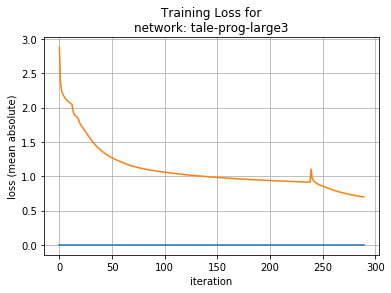

In [4]:
nd.plot_training_loss(network_model)

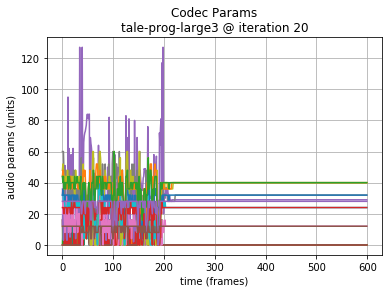

In [5]:
nd.plot_codec_params(network_model,iter1)

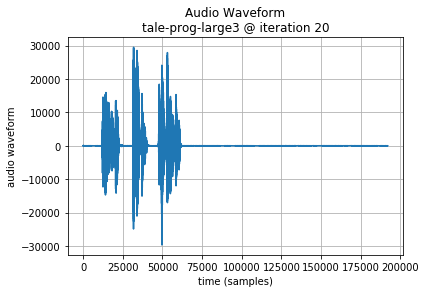

In [6]:
nd.plot_audio_waveform(network_model, iter1)

Listen to the WAV file

In [7]:
display(Audio(filename="/home/ec2-user/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter1)+".wav"))

Later Iterations
===

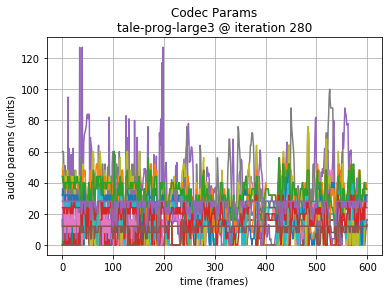

In [8]:
nd.plot_codec_params(network_model,iter2)

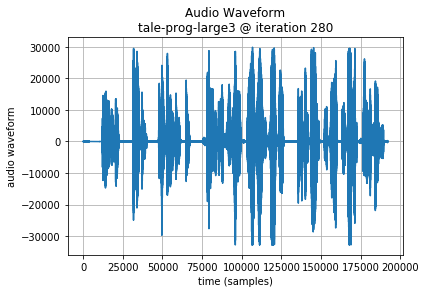

In [9]:
nd.plot_audio_waveform(network_model, iter2)

Listen to the WAV file

In [10]:
display(Audio(filename="/home/ec2-user/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter2)+".wav"))